In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Extracting Dataset and displaying top 5 data of the dataset

In [ ]:
from pandas.io.parsers.readers import read_csv
dir_path = "/content/drive/My Drive/SOEN6611_ProjectDataset/IBM.csv"

df = read_csv(dir_path)

df.head()
df.shape

(1470, 35)

Splitting the dataset into three data time frames namely T1, T2 and T3

In [ ]:
#Getting rows and columns
df.shape

#Dividing dataset into three dataframes t1, t2 and t3 for quality analysis. 
df_T1 = df.iloc[:400,:]
df_T2 = df.iloc[401:900,:]
df_T3 = df.iloc[901:,:]

print("The Size of all three timeframes are :  {}, {}, and {}".format(df_T1.shape, df_T2.shape, df_T3.shape))

The Size of all three timeframes are :  (400, 35), (499, 35), and (569, 35)


Displaying the size of each data time frame (T1, T2 and T3)

In [ ]:
#Getting the length of big data.
lbd_T1 = df_T1.shape[0]
lbd_T2 = df_T2.shape[0] + lbd_T1
lbd_T3 = df_T3.shape[0] + lbd_T2

print("The length of big data at each time frame would be: {}, {}, and {}".format(lbd_T1, lbd_T2, lbd_T3))

The length of big data at each time frame would be: 400, 899, and 1468


In [ ]:
nds_T1 = 1
nds_T2 = 1
nds_T3 = 1

In [ ]:
numberOfDistinctDataElements_T1 = 0
numberOfDistinctDataElements_T2 = 0
numberOfDistinctDataElements_T3 = 0

for col in df_T1.columns:
  numberOfDistinctDataElements_T1 += len(df_T1[col].unique()) 
print("Ndde at Time frame T1: " , numberOfDistinctDataElements_T1)

for col in df_T2.columns:
  numberOfDistinctDataElements_T2 += len(pd.concat([df_T1, df_T2])[col].unique()) 
print("Ndde at Time frame T2: " , numberOfDistinctDataElements_T2)

for col in df_T3.columns:
  numberOfDistinctDataElements_T3 += len(pd.concat([df_T1, df_T2, df_T3])[col].unique()) 
print("Ndde at Time frame T3: " , numberOfDistinctDataElements_T3)


Ndde at Time frame T1:  1896
Ndde at Time frame T2:  3655
Ndde at Time frame T3:  5500


In [ ]:
def calculate_acc_records(df):
  df = df.sort_values('YearsAtCompany')
  # print(df_T1) 
  lq = df.iloc[round(df.shape[0] * 1/4), df.columns.get_loc('YearsAtCompany')]
  uq = df.iloc[round(df.shape[0] * 3/4), df.columns.get_loc('YearsAtCompany')]
  # print(lq)
  # print(uq)
  # Acceptable range is [lq, uq]]
  # So the values outside of this range are considered as outliers and we will consider them as outdated records

  count_acc_records = 0 # Count of acceptable records 
  for column in df['YearsAtCompany']:
    if column >= lq and column <= uq:
      count_acc_records = count_acc_records + 1
  return count_acc_records

print("Rec_acc_age at T1: ", calculate_acc_records(df_T1))
print("Rec_acc_age at T2: ", calculate_acc_records(df_T2))
print("Rec_acc_age at T3: ", calculate_acc_records(df_T3))

Rec_acc_age at T1:  236
Rec_acc_age at T2:  302
Rec_acc_age at T3:  355


In [ ]:
def get_rec_no_null(df, offset):
  count_null = 0
  count_no_null = 0

  # print(df.isnull())
  
  for i, j in df.iterrows():
    for col in range(len(j)):
      if(df.iat[i-offset,col] == 'NaN'):
        count_null = count_null + 1
        break;
  
  #print("Records with null values: ", count_null)
  count_no_null = df.shape[0] - count_null
  #print("Records with no null values: ", count_no_null)
  return count_no_null

print("Rec_no_null at T1: ", get_rec_no_null(df_T1, 0))
print("Rec_no_null at T2: ", get_rec_no_null(pd.concat([df_T1, df_T2]), 401))
print("Rec_no_null at T3: ", get_rec_no_null(pd.concat([df_T1, df_T2, df_T3]), 901))

Rec_no_null at T1:  400
Rec_no_null at T2:  899
Rec_no_null at T3:  1468


In [ ]:
def get_complaince_record(df, offset):
  count_compliant = 0
  compliant = True
  for i, j in df.iterrows():
    for col in range(len(j)):
        # print(type(df_T1.iat[i,col]))
        if(type(df.iat[i-offset,col]) != df[df.columns[col]].dtype):
          compliant = False
          break
    if compliant == False:
      count_compliant = count_compliant + 1
      compliant = True
  return count_compliant

print("comp_record at T1: ", get_complaince_record(df_T1, 0))
print("comp_record at T2: ", get_complaince_record(pd.concat([df_T1, df_T2]), 401))
print("comp_record at T3: ", get_complaince_record(pd.concat([df_T1, df_T2, df_T3]), 901))

comp_record at T1:  400
comp_record at T2:  899
comp_record at T3:  1468


In [ ]:
def get_rec_trace(df):
  rec_no_trac = 0
  for column in df['Attrition']:
    if (column != 'Yes' and column != 1) and (column != 'No' and column != 0):
      rec_no_trac = rec_no_trac + 1

  rec_trace = df.shape[0] - rec_no_trac
  return rec_trace

print("rec_trace at T1: ", get_rec_trace(df_T1))
print("rec_trace at T2: ", get_rec_trace(pd.concat([df_T1, df_T2])))
print("rec_trace at T3: ", get_rec_trace(pd.concat([df_T1, df_T2, df_T3])))

rec_trace at T1:  400
rec_trace at T2:  899
rec_trace at T3:  1468


In [ ]:
print("ldst at T1: ", df_T1.shape[0])
print("ldst at T2: ", pd.concat([df_T1, df_T2]).shape[0])
print("ldst at T3: ", pd.concat([df_T1, df_T2, df_T3]).shape[0])

ldst at T1:  400
ldst at T2:  899
ldst at T3:  1468


Evaluating the accuracy of each time frame

In [ ]:
#Calculating base measures to be used in calculating veracity of big data

#Getting the values of duplicate records (Pj) in the dataset
def getAccuracy(df):
  ndde = 0

  for col in df.columns:
    ndde += len(df[col].unique()) 
  #print("Ndde" , ndde)

  TotalDataElements = df.shape[0] * df.shape[1]
  #print("Total Records in T1" , TotalDataElements) 

  pj = TotalDataElements - ndde
  #print("Pj" , pj)

  lbd = df.shape[0]

  #Calculating Hacc
  Hacc = math.log2(lbd) - ((1/(lbd*pj*math.log2(pj))))

  #print("Hacc ", Hacc)

  #Calculating Hmax
  Hmax = math.log2(lbd)

  #print("Hmax ", Hmax)

  #Calculating Accuracy
  acc = Hacc/Hmax
  # print("Accuracy : ", acc)

  return acc

Evaluating Completeness of each data time frame

In [ ]:
#Calculating Rec_no_null & Completeness at T1
def getCompleteness(df, offset):
  count_null = 0
  count_no_null = 0

  # print(df.isnull())
  
  for i, j in df.iterrows():
    for col in range(len(j)):
      if(df.iat[i-offset,col] == 'NaN'):
        count_null = count_null + 1
        break;
  
  #print("Records with null values: ", count_null)
  count_no_null = df.shape[0] - count_null
  #print("Records with no null values: ", count_no_null)

  #Calculating Completeness at T1
  completeness = count_no_null / df.shape[0]
  # print("Completeness:",completeness)
  return completeness


Evaluating Currentness of each data time frame

In [ ]:
#Calculating Rec_cc_age and currentness at T1
#Considered YearsAtCompany column to filter data records
def getCurrentness(df):

  df = df.sort_values('YearsAtCompany')
  # print(df_T1)
  lq = df.iloc[round(df.shape[0] * 1/4), df.columns.get_loc('YearsAtCompany')]
  uq = df.iloc[round(df.shape[0] * 3/4), df.columns.get_loc('YearsAtCompany')]
  # print(lq)
  # print(uq)
  # Acceptable range is [lq, uq]]
  # So the values outside of this range are considered as outliers and we will consider them as outdated records

  count_acc_records = 0 # Count of acceptable records 
  for column in df['YearsAtCompany']:
    if column >= lq and column <= uq:
      count_acc_records = count_acc_records + 1

  # print("Total acceptable records: ", count_acc_records)


  # Calculating currentness
  currentness = count_acc_records / df.shape[0]
  # print("Currentness: ",currentness)
  return currentness

Evaluating Availability of each data time frame

In [ ]:
#Availability of big data at time frame T1
#we assume the total number of requests would be around 258
#Total number of successful requests would be 200
def getAvailability(df, succ, total):    
  N_succ_req = df.shape[0] * succ
  N_req = df.shape[0] * total
  availability = N_succ_req/N_req
  # print("Availability:",availability)
  return availability

Calculating Big Data Veracity (Mver) 

In [ ]:
#Calculation for big data veracity at T1
def getMver(df, offset, succ, req):  
  W = 1/4
  Mver = W * getAccuracy(df) + W * getAvailability(df, succ, req) + W * getCurrentness(df) + W * getCompleteness(df, offset)
  return Mver

Mver at T1:  0.8349999995595653
Mver at T2:  0.8409880927613889
Mver at T3:  0.8444423053912649


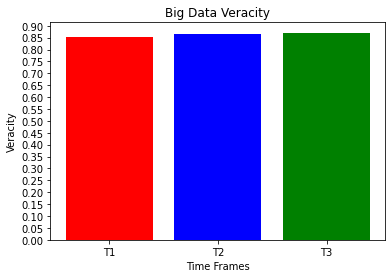

In [ ]:
print("Mver at T1: ", getMver(df_T1, 0, 0.60, 0.80))
print("Mver at T2: ", getMver(pd.concat([df_T1, df_T2]), 401, 0.75, 0.88))
print("Mver at T3: ", getMver(pd.concat([df_T1, df_T2, df_T3]), 901, 0.79, 0.92))

#plotting graph for Big Data Veracity
x = np.array(["T1", "T2", "T3"])
y = np.array([getMver(df_T1, 0, 0.70, 0.85), getMver(df_T2, 401, 0.75, 0.88), getMver(df_T3, 901, 0.79, 0.92)])

plt.title("Big Data Veracity")
plt.bar(x, y, color=["red", "blue", "green"])
ax=plt.gca()
ax.locator_params('y', nbins=20)
# plt.yticks(range(0,1,0.1))
plt.xlabel('Time Frames')
plt.ylabel('Veracity')

plt.show()

Evaluating Compliance of each data time frame

In [ ]:
#Calculating Compliance of big data at time frame T1

# print(df_T1.dtypes)
def getComplaince(df, offset):
  count_compliant = 0
  compliant = True
  for i, j in df.iterrows():
    for col in range(len(j)):
        # print(type(df_T1.iat[i,col]))
        if(type(df.iat[i-offset,col]) != df[df.columns[col]].dtype):
          compliant = False
          break
    if compliant == False:
      count_compliant = count_compliant + 1
      compliant = True
  #print("Total number of compliant records at T1: ", count_compliant_T1)
  nds = 1
  #Calculating compliance
  compliance = count_compliant / (nds * df.shape[0])
  # print("Compliance:", compliance)
  return compliance

Evaluating credibilty of each data time frame

In [ ]:
# Calculating Credibility
# Here we have given only one dataset. Also it is obtained from reliable source (www.kaggle.com).
# So we can consider it as a reliable dataset.
def getCredibility():    
  Nds_cr = 1
  Nds = 1 # We have given only one dataset to use

  credibility = Nds_cr / Nds
  # print("Credibility:", credibility)
  return credibility 

Calculating Big Data Validity (Mval)

In [ ]:
#Calculation for big data validity at T1
def getMval(df, offset):
  W = 1/2
  Mval = W * getComplaince(df, offset) + W * getCredibility()
  return Mval

Mval at T1:  1.0
Mval at T2:  1.0
Mval at T3:  1.0


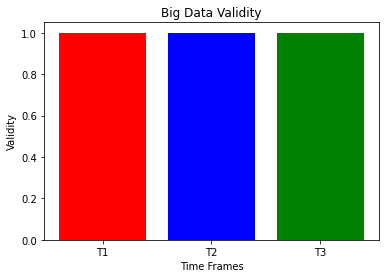

In [ ]:
#plotting graph for Big Data Validity
print("Mval at T1: ", getMval(df_T1, 0))
print("Mval at T2: ", getMval(pd.concat([df_T1, df_T2]), 401))
print("Mval at T3: ", getMval(pd.concat([df_T1, df_T2, df_T3]), 901))

x = np.array(["T1", "T2", "T3"])
y = np.array([getMval(df_T1,0), getMval(pd.concat([df_T1, df_T2]),401), getMval(pd.concat([df_T1, df_T2, df_T3]),901)])

plt.title("Big Data Validity")
plt.bar(x, y, color=["red", "blue", "green"])
plt.xlabel('Time Frames')
plt.ylabel('Validity')

plt.show()

Calculation of Traceability

In [ ]:
def traceability(Nds, ldst, df):
  rec_no_trac = 0
  for column in df['Attrition']:
    if (column != 'Yes' and column != 1) and (column != 'No' and column != 0):
      rec_no_trac = rec_no_trac + 1

  rec_trace = df.shape[0] - rec_no_trac

  trace = rec_trace/ldst
  # print("Treceability:", trace)
  return trace


Calculation of big data Vincularity

In [ ]:
def getMvin(nds, ldst, df):
  vincularity = traceability(nds, ldst, df) / nds
  return vincularity

Calculating Vincularity for T1, T2 and T3

Vincularity at T1 : 1.0
Vincularity at T2 : 1.0
Vincularity at T3 : 1.0


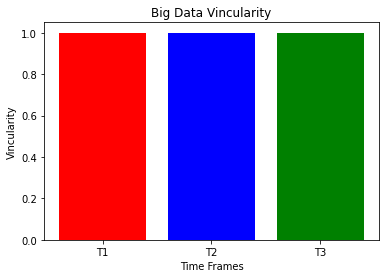

In [ ]:
#plotting graph for Big Data Validity
print("Vincularity at T1 :", getMvin(nds_T1, df_T1.shape[0],df_T1))
print("Vincularity at T2 :", getMvin(nds_T2, pd.concat([df_T1, df_T2]).shape[0],pd.concat([df_T1, df_T2])))
print("Vincularity at T3 :", getMvin(nds_T3, pd.concat([df_T1, df_T2, df_T3]).shape[0],pd.concat([df_T1, df_T2, df_T3])))

x = np.array(["T1", "T2", "T3"])
y = np.array([getMvin(nds_T1, df_T1.shape[0],df_T1), getMvin(nds_T2, pd.concat([df_T1, df_T2]).shape[0],pd.concat([df_T1, df_T2])), getMvin(nds_T3, pd.concat([df_T1, df_T2, df_T3]).shape[0],pd.concat([df_T1, df_T2, df_T3]))])

plt.title("Big Data Vincularity")
plt.bar(x, y, color=["red", "blue", "green"])
plt.xlabel('Time Frames')
plt.ylabel('Vincularity')

plt.show()

Summary of values of all derieved measures at different time frames

In [ ]:
print("Accuracy at T1:", getAccuracy(df_T1))
print("Accuracy at T2:", getAccuracy(pd.concat([df_T1, df_T2])))
print("Accuracy at T3:", getAccuracy(pd.concat([df_T1, df_T2, df_T3])))
print('\n')

print("Completeness at T1: ", getCompleteness(df_T1,0))
print("Completeness at T2: ", getCompleteness(pd.concat([df_T1, df_T2]), 401))
print("Completeness at T3: ", getCompleteness(pd.concat([df_T1, df_T2, df_T3]), 901))
print('\n')

print("Currentness at T1:", getCurrentness(df_T1))
print("Currentness at T2:", getCurrentness(df_T2))
print("Currentness at T3:", getCurrentness(df_T3))
print('\n')

print("Availability at T1:",  getAvailability(df_T1, 0.60, 0.80))
print("Availability at T2:",  getAvailability(pd.concat([df_T1, df_T2]), 0.75, 0.88))
print("Availability at T3:",  getAvailability(pd.concat([df_T1, df_T2, df_T3]), 0.79, 0.92))
print('\n')

print("Compliance at T1:", getComplaince(df_T1, 0))
print("Compliance at T2:", getComplaince(pd.concat([df_T1, df_T2]), 401))
print("Compliance at T3:", getComplaince(pd.concat([df_T1, df_T2, df_T3]), 901))
print('\n')

print("Credibility at T1:", getCredibility())
print("Credibility at T2:", getCredibility())
print("Credibility at T3:", getCredibility())
print('\n')

print("Traceability at T1 :", traceability(nds_T1, df_T1.shape[0],df_T1))
print("Traceability at T2 :", traceability(nds_T2, pd.concat([df_T1, df_T2]).shape[0],pd.concat([df_T1, df_T2])))
print("Traceability at T3 :", traceability(nds_T3, pd.concat([df_T1, df_T2, df_T3]).shape[0],pd.concat([df_T1, df_T2, df_T3])))
print('\n')

Accuracy at T1: 0.9999999982382612
Accuracy at T2: 0.9999999997238851
Accuracy at T3: 0.9999999999088572


Completeness at T1:  1.0
Completeness at T2:  1.0
Completeness at T3:  1.0


Currentness at T1: 0.59
Currentness at T2: 0.6052104208416834
Currentness at T3: 0.6239015817223199


Availability at T1: 0.75
Availability at T2: 0.8522727272727273
Availability at T3: 0.8586956521739131


Compliance at T1: 1.0
Compliance at T2: 1.0
Compliance at T3: 1.0


Credibility at T1: 1.0
Credibility at T2: 1.0
Credibility at T3: 1.0


Traceability at T1 : 1.0
Traceability at T2 : 1.0
Traceability at T3 : 1.0




Summary of values of 3 V's in different timeframes

In [ ]:
print("Mver at T1: ", getMver(df_T1, 0, 0.60, 0.80))
print("Mver at T2: ", getMver(pd.concat([df_T1, df_T2]), 401, 0.75, 0.88))
print("Mver at T3: ", getMver(pd.concat([df_T1, df_T2, df_T3]), 901, 0.79, 0.92))
print('\n')

print("Mval at T1: ", getMval(df_T1, 0))
print("Mval at T2: ", getMval(pd.concat([df_T1, df_T2]), 401))
print("Mval at T3: ", getMval(pd.concat([df_T1, df_T2, df_T3]), 901))
print('\n')

print("Vincularity at T1 :", getMvin(nds_T1, df_T1.shape[0],df_T1))
print("Vincularity at T2 :", getMvin(nds_T2, pd.concat([df_T1, df_T2]).shape[0],pd.concat([df_T1, df_T2])))
print("Vincularity at T3 :", getMvin(nds_T3, pd.concat([df_T1, df_T2, df_T3]).shape[0],pd.concat([df_T1, df_T2, df_T3])))

Mver at T1:  0.8349999995595653
Mver at T2:  0.8409880927613889
Mver at T3:  0.8444423053912649


Mval at T1:  1.0
Mval at T2:  1.0
Mval at T3:  1.0


Vincularity at T1 : 1.0
Vincularity at T2 : 1.0
Vincularity at T3 : 1.0


Average value of 3 V's at the end of the process

In [ ]:
print('Average Mver:',(getMver(df_T1, 0, 0.60, 0.80) + getMver(pd.concat([df_T1, df_T2]), 401, 0.75, 0.88) + getMver(pd.concat([df_T1, df_T2, df_T3]), 901, 0.79, 0.92)) / 3)
print('Average Mval:', (getMval(df_T1, 0) + getMval(pd.concat([df_T1, df_T2]), 401) + getMval(pd.concat([df_T1, df_T2, df_T3]), 901)) / 3)
print('Average Mvin:', (getMvin(nds_T1, df_T1.shape[0],df_T1) + getMvin(nds_T2, pd.concat([df_T1, df_T2]).shape[0],pd.concat([df_T1, df_T2])) + getMvin(nds_T3, pd.concat([df_T1, df_T2, df_T3]).shape[0],pd.concat([df_T1, df_T2, df_T3]))) / 3)

Average Mver: 0.840143465904073
Average Mval: 1.0
Average Mvin: 1.0



**Part 2: Data cleaning, Data pre-processing and Data processing and then measuring 3 V's on the dataset at three different time frames**

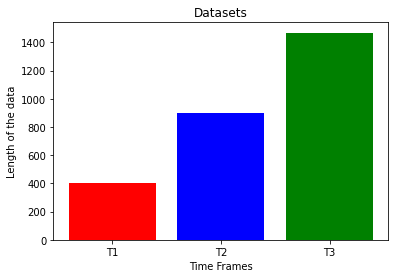

In [ ]:
#Data Extraction
path = "/content/drive/My Drive/SOEN6611_ProjectDataset/IBM.csv"
df_part2 = read_csv(path)

#Dividing dataset into three dataframes t1, t2 and t3 for quality analysis. 
df_part2_T1_original = df_part2.iloc[:400,:]
df_part2_T2_original = df_part2.iloc[401:900,:]
df_part2_T3_original = df_part2.iloc[901:,:]

df_part2_T1 = df_part2_T1_original.copy()
df_part2_T2 = df_part2_T2_original.copy()
df_part2_T3 = df_part2_T3_original.copy()


df_part2.head()

x = np.array(["T1", "T2", "T3"])
y = np.array([len(df_part2_T1), len(df_part2_T2) + len(df_part2_T1), len(df_part2_T3)+len(df_part2_T2) + len(df_part2_T1)])

plt.title("Datasets")
plt.bar(x, y, color=["red", "blue", "green"])
plt.xlabel('Time Frames')
plt.ylabel('Length of the data')

plt.show()

 **Data Pipeline (Data Extraction, Data preprocessing and Data Processing) process for Timeframe T1**

Data Extraction

In [ ]:
def dataExtract(df, nds, succ, req, offset):
  print("Size of Data frame: ",df.shape)


  #Calculating Veracity, Validity and Vincularity
  Mver = getMver(df, offset, succ, req)
  Mval = getMval(df, offset)
  Mvin = getMvin(nds, df.shape[0],df)
  print(df.shape)
  print("Mver: ", Mver)
  print("Mval: ", Mval)
  print("Mvin :", Mvin)
  return [Mver, Mval, Mvin]

In [ ]:
values_dataExtraction_T1 = dataExtract(df_part2_T1, nds_T1, 0.60, 0.80, 0)

Mver_dataExtraction_T1 = values_dataExtraction_T1[0]
Mval_dataExtraction_T1 = values_dataExtraction_T1[1]
Mvin_dataExtraction_T1 = values_dataExtraction_T1[2]

Size of Data frame:  (400, 35)
(400, 35)
Mver:  0.8349999995595653
Mval:  1.0
Mvin : 1.0


Data Cleaning (Data Preprocessing)

In [ ]:
#Data Cleaning part at T1

def dataCleaning(df, nds, succ, req, offset):
  #Removing Empty cells by removing rows having null values/empty cells.
  df.dropna(inplace = True)

  #Removing duplicate records from the dataframe
  df.drop_duplicates(inplace = True)

  print("Size after cleaning")
  return dataExtract(df, nds, succ, req, offset)

values_dataCleaning_T1 = dataCleaning(df_part2_T1, nds_T1, 0.60, 0.80, 0)

Mver_dataCleaning_T1 = values_dataCleaning_T1[0]
Mval_dataCleaning_T1 = values_dataCleaning_T1[1]
Mvin_dataCleaning_T1 = values_dataCleaning_T1[2]

#print(Mver_dataExtraction_T1, " ", Mval_dataExtraction_T2, " ", Mvin_dataExtraction_T3)


Size after cleaning
Size of Data frame:  (400, 35)
(400, 35)
Mver:  0.8349999995595653
Mval:  1.0
Mvin : 1.0


Data Processing

In [ ]:
# Converting categorical values into numeric values
def dataProcessing(df, nds, succ, req, offset):
  # Yes -> 1
  # No -> 0
  df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
  df.head()



  df['BusinessTravel'].value_counts()

  # Travel_Rarely -> 0
  # Travel_Frequently -> 1
  # Non_Travel -> 2
  df['BusinessTravel'] = df['BusinessTravel'].factorize(['Travel_Rarely','Travel_Frequently, Non_Travel'])[0]
  df.head()



  df['Department'].value_counts()

  # Research & Development    0
  # Sales                     1
  # Human Resources           2
  df['Department'] = df['Department'].factorize(['Research & Development','Sales', 'Human Resources'])[0]
  df.head()



  df['EducationField'].value_counts()

  # Life Sciences       0
  # Medical             1
  # Marketing           2
  # Technical Degree    3
  # Other               4
  # Human Resources     5

  df['EducationField'] = df['EducationField'].factorize(['Life Sciences','Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources'])[0]
  df.head()




  df['Gender'].value_counts()
  # Male      882
  # Female    588

  df['Gender'] = df['Gender'].factorize(['Male', 'Female'])[0]
  df.head()




  df['JobRole'].value_counts()

  # Sales Executive              0
  # Research Scientist           1
  # Laboratory Technician        2
  # Manufacturing Director       3
  # Healthcare Representative    4
  # Manager                      5
  # Sales Representative         6
  # Research Director            7
  # Human Resources              8
  df['JobRole'] = df['JobRole'].factorize(['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'])[0]
  df.head()




  df['MaritalStatus'].value_counts()
  # Married     0
  # Single      1
  # Divorced    2
  df['JobRole'] = df['JobRole'].factorize(['Married', 'Single', 'Divorced'])[0]
  df.head()





  df['Over18'].value_counts()
  # Y     0
  # N     1
  df['Over18'] = df['Over18'].factorize(['Y', 'N'])[0]
  df.head()





  df['OverTime'].value_counts()
  # Yes     0
  # No      1
  df['OverTime'] = df['OverTime'].factorize(['Yes', 'No'])[0]
  df.head()


  return dataExtract(df, nds, succ, req, offset)

values_dataProcessing_T1 = dataProcessing(df_part2_T1, nds_T1, 0.60, 0.80, 0)

Mver_dataProcessing_T1 = values_dataProcessing_T1[0]
Mval_dataProcessing_T1 = values_dataProcessing_T1[1]
Mvin_dataProcessing_T1 = values_dataProcessing_T1[2]

#print(Mver_dataProcessing_T1, " ", Mval_dataProcessing_T1, " ", Mvin_dataProcessing_T1)

Size of Data frame:  (400, 35)
(400, 35)
Mver:  0.8349999995595653
Mval:  1.0
Mvin : 1.0


In [ ]:
df_part2_T1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data Pipeline (Data Extraction, Data preprocessing and Data Processing) process for Timeframe T2**



Data Extraction

In [ ]:
#Data Extraction
df_part2_T11 = df_part2_T1_original.copy()
df_part2_T21 = df_part2_T2_original.copy()
values_dataExtraction_T2 = dataExtract(pd.concat([df_part2_T11, df_part2_T21]), nds_T2, 0.75, 0.88, 401)

Mver_dataExtraction_T2 = values_dataExtraction_T2[0]
Mval_dataExtraction_T2 = values_dataExtraction_T2[1]
Mvin_dataExtraction_T2 = values_dataExtraction_T2[2]

#print(Mver_dataExtraction_T2)

Size of Data frame:  (899, 35)
(899, 35)
Mver:  0.8409880927613889
Mval:  1.0
Mvin : 1.0


Data Cleaning (Data Preprocessing)

In [ ]:
values_dataCleaning_T2 = dataCleaning(pd.concat([df_part2_T11, df_part2_T21]), nds_T2, 0.75, 0.88, 401)

Mver_dataCleaning_T2 = values_dataCleaning_T2[0]
Mval_dataCleaning_T2 = values_dataCleaning_T2[1]
Mvin_dataCleaning_T2 = values_dataCleaning_T2[2]

#print(Mver_dataCleaning_T2)

Size after cleaning
Size of Data frame:  (899, 35)
(899, 35)
Mver:  0.8409880927613889
Mval:  1.0
Mvin : 1.0


Data Processing

In [ ]:
values_dataProcessing_T2 = dataProcessing(pd.concat([df_part2_T11, df_part2_T21]), nds_T2, 0.75, 0.88, 401)

Mver_dataProcessing_T2 = values_dataProcessing_T2[0]
Mval_dataProcessing_T2 = values_dataProcessing_T2[1]
Mvin_dataProcessing_T2 = values_dataProcessing_T2[2]

#print(Mver_dataProcessing_T2)

Size of Data frame:  (899, 35)
(899, 35)
Mver:  0.8409880927613889
Mval:  1.0
Mvin : 1.0


**Data Pipeline (Data Extraction, Data preprocessing and Data Processing) process for Timeframe T3**


In [ ]:
#Data Extraction
df_part2_T1 = df_part2_T1_original.copy()
df_part2_T2 = df_part2_T2_original.copy()
df_part2_T3 = df_part2_T3_original.copy()
values_dataExtraction_T3 = dataExtract(pd.concat([df_part2_T1, df_part2_T2, df_part2_T3]), nds_T3, 0.79, 0.92, 901)

Mver_dataExtraction_T3 = values_dataExtraction_T3[0]
Mval_dataExtraction_T3 = values_dataExtraction_T3[1]
Mvin_dataExtraction_T3 = values_dataExtraction_T3[2]

#print(Mver_dataExtraction_T3)

Size of Data frame:  (1468, 35)
(1468, 35)
Mver:  0.8444423053912649
Mval:  1.0
Mvin : 1.0


In [ ]:
values_dataCleaning_T3 = dataCleaning(pd.concat([df_part2_T1, df_part2_T2, df_part2_T3]), nds_T3, 0.79, 0.92, 901)

Mver_dataCleaning_T3 = values_dataExtraction_T3[0]
Mval_dataCleaning_T3 = values_dataExtraction_T3[1]
Mvin_dataCleaning_T3 = values_dataExtraction_T3[2]

#print(Mver_dataCleaning_T3)

Size after cleaning
Size of Data frame:  (1468, 35)
(1468, 35)
Mver:  0.8444423053912649
Mval:  1.0
Mvin : 1.0


In [ ]:
values_dataProcessing_T3 = dataProcessing(pd.concat([df_part2_T1, df_part2_T2, df_part2_T3]), nds_T3, 0.79, 0.92, 901)

Mver_dataProcessing_T3 = values_dataProcessing_T3[0]
Mval_dataProcessing_T3 = values_dataProcessing_T3[1]
Mvin_dataProcessing_T3 = values_dataProcessing_T3[2]

#print(Mver_dataProcessing_T3)

Size of Data frame:  (1468, 35)
(1468, 35)
Mver:  0.8444423053912649
Mval:  1.0
Mvin : 1.0


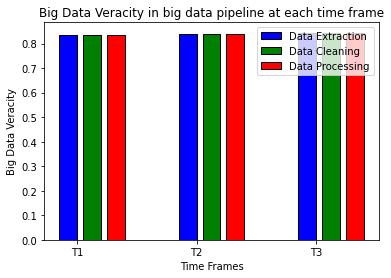

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
    
n=3
r = np.arange(n)
width = .15
  
  
plt.bar(r, [Mver_dataExtraction_T1, Mver_dataExtraction_T2, Mver_dataExtraction_T3], color = 'b',
        width = width, edgecolor = 'black',
        label='Data Extraction')

plt.bar(r + width + 0.05, [Mver_dataCleaning_T1, Mver_dataCleaning_T2, Mver_dataCleaning_T3], color = 'g',
        width = width, edgecolor = 'black',
        label='Data Cleaning')

plt.bar(r + width + width + 0.1, [Mver_dataProcessing_T1, Mver_dataProcessing_T2, Mver_dataProcessing_T3], color = 'r',
        width = width, edgecolor = 'black',
        label='Data Processing')

plt.xlabel("Time Frames")
plt.ylabel("Big Data Veracity")
plt.title("Big Data Veracity in big data pipeline at each time frame")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['T1','T2','T3'])
plt.legend()
  
plt.show()

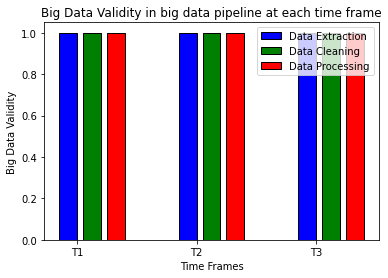

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
    
n=3
r = np.arange(n)
width = .15
  
  
plt.bar(r, [Mval_dataExtraction_T1, Mval_dataExtraction_T2, Mval_dataExtraction_T3], color = 'b',
        width = width, edgecolor = 'black',
        label='Data Extraction')

plt.bar(r + width + 0.05, [Mval_dataCleaning_T1, Mval_dataCleaning_T2, Mval_dataCleaning_T3], color = 'g',
        width = width, edgecolor = 'black',
        label='Data Cleaning')

plt.bar(r + width + width + 0.1, [Mval_dataProcessing_T1, Mval_dataProcessing_T2, Mval_dataProcessing_T3], color = 'r',
        width = width, edgecolor = 'black',
        label='Data Processing')

plt.xlabel("Time Frames")
plt.ylabel("Big Data Validity")
plt.title("Big Data Validity in big data pipeline at each time frame")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['T1','T2','T3'])
plt.legend()
  
plt.show()

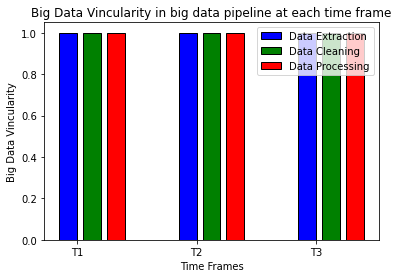

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
    
n=3
r = np.arange(n)
width = .15
  
  
plt.bar(r, [Mvin_dataExtraction_T1, Mvin_dataExtraction_T2, Mvin_dataExtraction_T3], color = 'b',
        width = width, edgecolor = 'black',
        label='Data Extraction')

plt.bar(r + width + 0.05, [Mvin_dataCleaning_T1, Mvin_dataCleaning_T2, Mvin_dataCleaning_T3], color = 'g',
        width = width, edgecolor = 'black',
        label='Data Cleaning')

plt.bar(r + width + width + 0.1, [Mvin_dataProcessing_T1, Mvin_dataProcessing_T2, Mvin_dataProcessing_T3], color = 'r',
        width = width, edgecolor = 'black',
        label='Data Processing')

plt.xlabel("Time Frames")
plt.ylabel("Big Data Vincularity")
plt.title("Big Data Vincularity in big data pipeline at each time frame")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['T1','T2','T3'])
plt.legend()
  
plt.show()